In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import metrics
import kmeans_helper as mykm
import matplotlib.cm as cm

In [90]:
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/strlabeleddf.pkl')
# pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/clean.pkl')


In [91]:
df.head()

,yr_born,yr_died,yrpub,numlines,numstanzas,avgline_stanza,enj_score,ttr,abstraction_score,lesk_abs_score,pronoun_score,title_lesk_abs,conjunction_ratio,nps_ratio,vps_ratio,aps_ratio,avg_nps_cscore,avg_vps_cscore,avg_aps_cscore,1_w_nps_fr,2_w_nps_fr,3_w_nps_fr,4_w_nps_fr,5_w_nps_fr,6_w_nps_fr,7_w_nps_fr,8_w_nps_fr,9_w_nps_fr,10_w_nps_fr,11_w_nps_fr,12_w_nps_fr,13_w_nps_fr,14_w_nps_fr,15_w_nps_fr,16_w_nps_fr,strlabel,label
0,0,0,2014,29,1,29.000000,117.500000,0.790323,1.359744,1.160494,0.500000,0.916667,4.166667,0.407407,0.388889,0.203704,1.272727,1.714286,1.363636,0.772727,0.181818,0.045455,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,Modern,0
1,0,0,2006,14,4,3.500000,1.714286,0.688406,1.213331,1.285714,0.142857,1.200000,2.428571,0.438596,0.333333,0.228070,1.600000,2.263158,1.076923,0.520000,0.360000,0.120000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,Contemp,1
2,1942,1997,1995,35,1,35.000000,8.916667,0.630662,1.137083,1.133333,0.333333,1.076923,4.250000,0.462963,0.388889,0.148148,1.480000,1.666667,1.125000,0.600000,0.320000,0.080000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,Contemp,1
3,1926,2001,1981,40,13,3.076923,41.000000,0.633540,1.367871,1.189655,2.000000,1.214286,35.000000,0.380000,0.440000,0.180000,1.736842,1.318182,1.555556,0.578947,0.157895,0.210526,0.052632,0,0,0,0,0,0,0,0,0,0,0,0,Exp,0
4,1926,2001,1986,45,7,6.428571,45.000000,0.580508,1.393122,1.284483,3.000000,1.500000,44.000000,0.511905,0.416667,0.071429,1.465116,1.942857,1.166667,0.720930,0.116279,0.139535,0.023256,0,0,0,0,0,0,0,0,0,0,0,0,Exp,0


In [92]:
#drop these two columns because not useful right now
df.drop(['yr_born', 'yr_died'], axis=1, inplace=True)
#drop outliers
df = df.query('numlines < 150')
df = df.query('enj_score < 500')
df = df.query('numstanzas < 50')
df = df.query('avgline_stanza < 100')
df = df.query('title_lesk_abs < 2.0')
df = df.query('conjunction_ratio < 50')

In [93]:
print len(df)
print df.columns
len(df.query('conjunction_ratio > 50'))

1337
Index([u'yrpub', u'numlines', u'numstanzas', u'avgline_stanza', u'enj_score',
       u'ttr', u'abstraction_score', u'lesk_abs_score', u'pronoun_score',
       u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio', u'vps_ratio',
       u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore', u'avg_aps_cscore',
       u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr', u'4_w_nps_fr',
       u'5_w_nps_fr', u'6_w_nps_fr', u'7_w_nps_fr', u'8_w_nps_fr',
       u'9_w_nps_fr', u'10_w_nps_fr', u'11_w_nps_fr', u'12_w_nps_fr',
       u'13_w_nps_fr', u'14_w_nps_fr', u'15_w_nps_fr', u'16_w_nps_fr',
       u'strlabel', u'label'],
      dtype='object')


0

In [120]:
cols = ['enj_score','ttr','lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1_w_nps_fr','2_w_nps_fr','3_w_nps_fr','4_w_nps_fr','5_w_nps_fr','6_w_nps_fr','7_w_nps_fr',
             '8_w_nps_fr','9_w_nps_fr','10_w_nps_fr','11_w_nps_fr','12_w_nps_fr','13_w_nps_fr', '14_w_nps_fr',
             '15_w_nps_fr','16_w_nps_fr'
            ]

X = df[cols]

In [121]:
# metrics.silhouette_score(X, labels, metric='euclidean')
X = df.ix[:, 4:-2]
for k in xrange(2,12):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels = km.labels_
    print k, metrics.silhouette_score(X, labels, metric='euclidean')

2 0.80683184467
3 0.778394796491
4 0.757513305738
5 0.716501745437
6 0.711781667332
7 0.67216764178
8 0.555829192983
9 0.508353841777
10 0.509373178642
11 0.503005812839


In [122]:
X.columns

Index([u'enj_score', u'ttr', u'abstraction_score', u'lesk_abs_score',
       u'pronoun_score', u'title_lesk_abs', u'conjunction_ratio', u'nps_ratio',
       u'vps_ratio', u'aps_ratio', u'avg_nps_cscore', u'avg_vps_cscore',
       u'avg_aps_cscore', u'1_w_nps_fr', u'2_w_nps_fr', u'3_w_nps_fr',
       u'4_w_nps_fr', u'5_w_nps_fr', u'6_w_nps_fr', u'7_w_nps_fr',
       u'8_w_nps_fr', u'9_w_nps_fr', u'10_w_nps_fr', u'11_w_nps_fr',
       u'12_w_nps_fr', u'13_w_nps_fr', u'14_w_nps_fr', u'15_w_nps_fr',
       u'16_w_nps_fr'],
      dtype='object')

In [123]:
type(X)

X = X.as_matrix()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.80683184467023505)


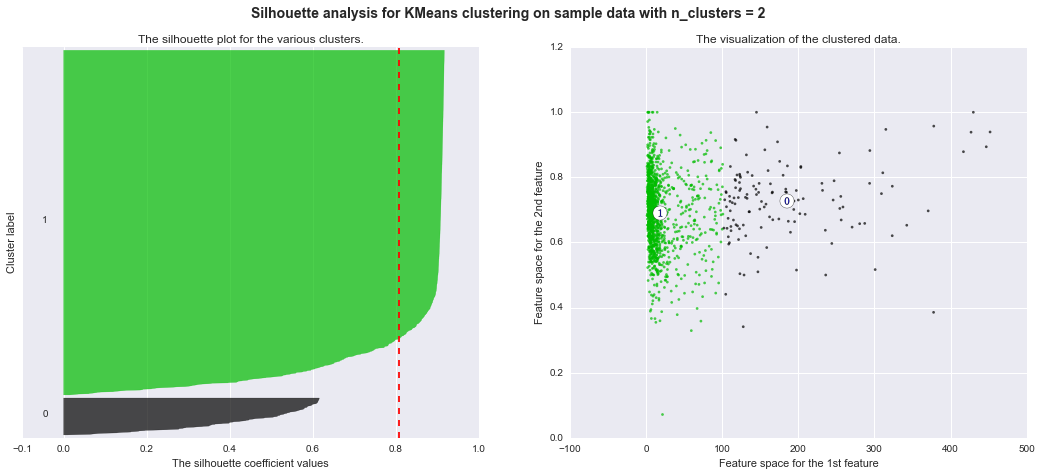

('For n_clusters =', 3, 'The average silhouette_score is :', 0.77839479649136245)


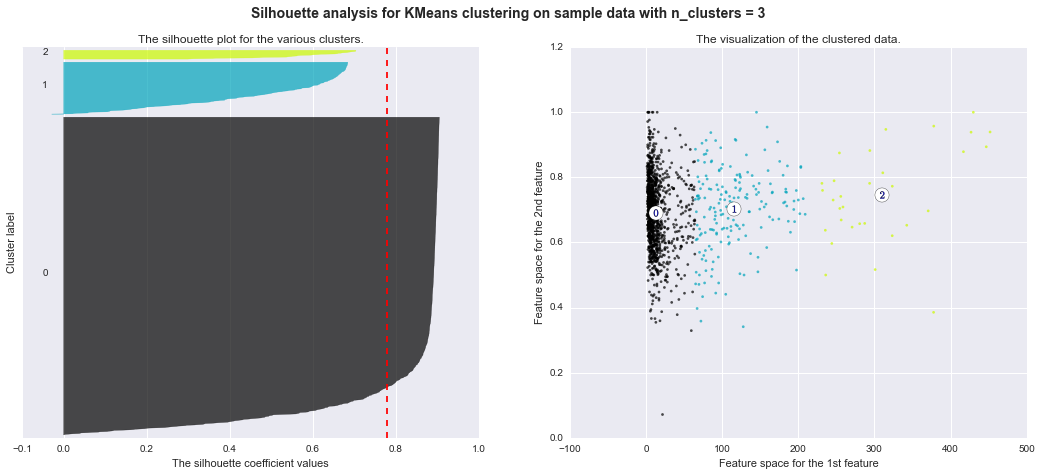

In [129]:
range_n_clusters = [2, 3]
#                     , 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [125]:
# km = KMeans(n_clusters=2,  init='random', n_init=1 , max_iter = 100, random_state=1)
km = KMeans(n_clusters=2, init='k-means++', n_init=1 , max_iter = 300, random_state=1)
Y_hat = km.fit(X).labels_
centroids = km.cluster_centers_
# centroids
y = km.predict(X)
print y
# y
# plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
centroids = km.cluster_centers_
print centroids

# plt.scatter(centroids[:,0], centroids[:,1],s=100,c=np.unique(Y_hat))

[1 0 0 ..., 0 0 0]
[[  1.84025723e+01   6.90991771e-01   1.28433963e+00   1.14975533e+00
    3.74111639e-01   1.23969280e+00   5.26197484e+00   5.21420237e-01
    3.33056785e-01   1.45522978e-01   1.54614638e+00   1.98548450e+00
    1.17503584e+00   6.09842305e-01   2.60534532e-01   1.11710678e-01
    1.32843553e-02   2.89111315e-03   9.27106945e-04   2.91683690e-04
    2.38043354e-04   6.44877470e-05   9.94700292e-05   7.26754749e-06
    9.20556016e-05   9.63372575e-06   0.00000000e+00   0.00000000e+00
    7.26754749e-06]
 [  1.84935783e+02   7.26214236e-01   1.28455111e+00   1.15583876e+00
    4.63916050e-01   1.23796896e+00   5.54948121e+00   5.14141363e-01
    3.21026840e-01   1.64831797e-01   1.59022757e+00   2.00686452e+00
    1.18254791e+00   5.83607881e-01   2.68786533e-01   1.24131531e-01
    2.13856916e-02   1.66905983e-03   2.95234471e-04  -3.25260652e-19
    1.24069479e-04   1.21972744e-19  -1.89735380e-19  -6.77626358e-21
    2.71050543e-20   1.18584613e-20   0.00000000e+0

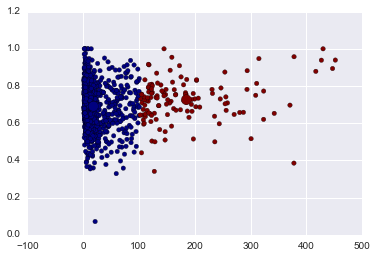

In [126]:
plt.jet()
plt.scatter(X[:,0], X[:,1], c=Y_hat);
plt.scatter(centroids[:,0], centroids[:,1],s=100,c=np.unique(Y_hat))